<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/5_Visualizacion/Visualizacion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Visualización con Pandas

Recorrido por las diferentes opciones que tenemos a la hora de realizar gráficos. Se utilizarán [Matplotlib](https://matplotlib.org/stable/index.html) y [Plotly](https://plotly.com/) como backend de los gráficos y también resutará utils la libreria [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) para realizar visualizaciones de manera más simple y rápida.


Empezamos, importamos las librerias a utilizar.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Matplotlib

Matplotlib será el backend de nuestros gráficos. Veremos que cada gráfico de matplotlib se compone por un objeto del tipo **Figure**, que será donde se grafiquen los datos. Cada figura contiene uno o más ejes, llamados **Axes**. Dentro de estos objetos podremos acceder a métodos y atributos que nos permitirán graficar los datos y configurar nuestros gráficos.

Eje (Axes) es el gráfico

Figure es el objeto compuesto por uno o más ejes

Primer acercamiento

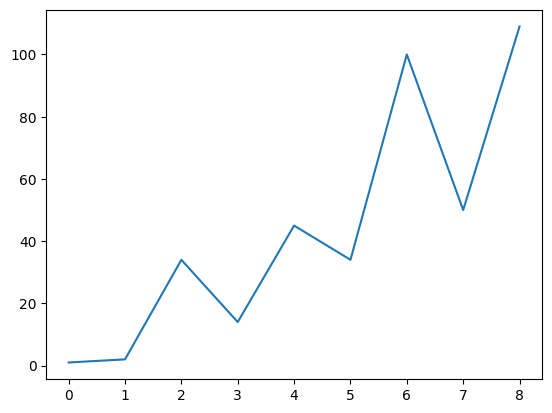

In [52]:
# Toma como parametro un array. Por defecto, realiza una figura 2D
# Si solo se pasa un array de un elemento solo en cada componente, toma por defecto para el eje X los valores 0, 1, 2, 3, 4, 5...
# Para el eje Y toma los valores que les pasamos

plt.plot([1,2,34,14,45,34,100, 50,109])

Ahora creamos un objeto Figure (fig) y otro Axes (ax). Luegos gráficamos unos puntos.

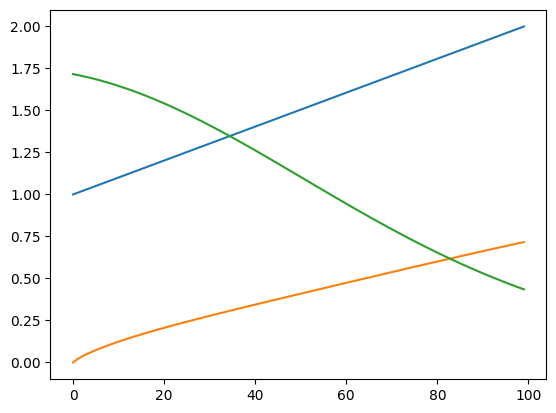

In [53]:
fig, ax = plt.subplots()

z1 = np.linspace(1, 2, 100) # start, stop, step
z2 = np.log(z1) ** np.sin(z1) # funcion exponencial
z3 = np.exp(z1) ** np.cos(z1)

ax.plot(z1)
ax.plot(z2)
ax.plot(z3)

fig.show()

Le podemos agregar un título y nombre a los ejes, al igual que etiquetas a cada una de las trazas.

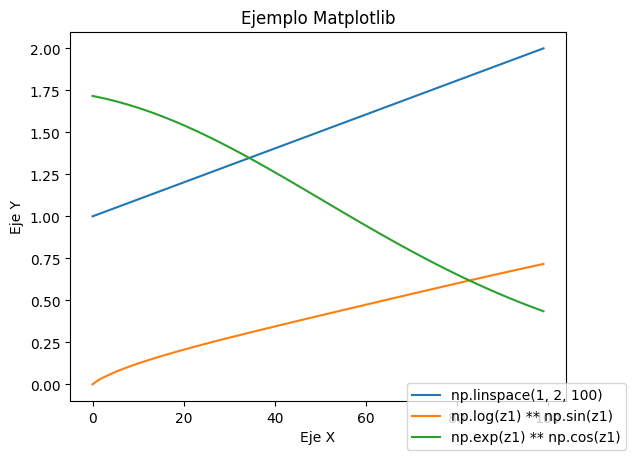

In [54]:
fig, ax = plt.subplots()

ax.set_title('Ejemplo Matplotlib') # Por defecto toma el grafico ax[0]
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

ax.plot(z1, label = 'np.linspace(1, 2, 100)')
ax.plot(z2, label = 'np.log(z1) ** np.sin(z1)')
ax.plot(z3, label = 'np.exp(z1) ** np.cos(z1)')

# Muestra leyenda (labels), en la ubicacion que se pasa por parametro. Si no se pasa nada, por defecto es 'upper right' Revisar documentacion
fig.legend(loc=4, )
fig.show()

Tambien podemos visualizar tres gráficos distintos en una misma figura. De la misma manera se podría configurar cada uno de los ejes.

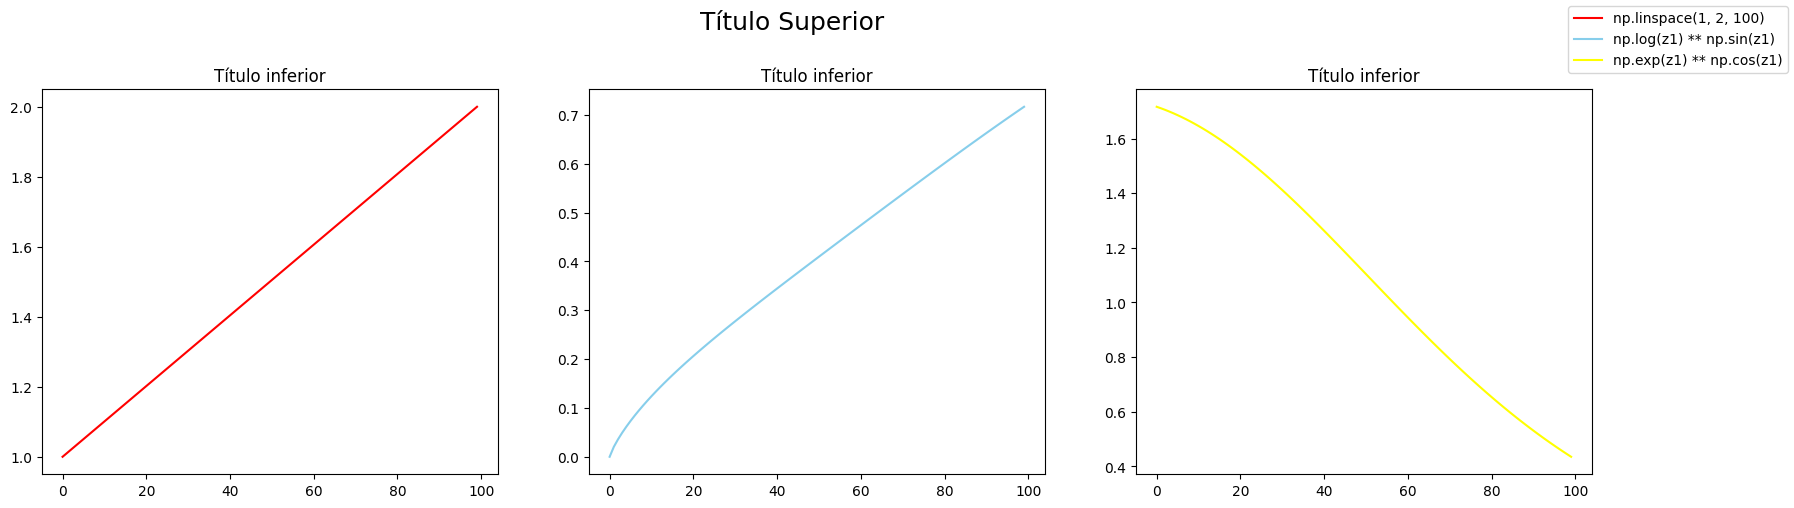

In [55]:
fig, ax = plt.subplots(figsize = (20,5), ncols=3, nrows=1)

# Titulo de la figura
fig.suptitle('Título Superior', fontsize=18, y = 1.04)

# Titulo de cada eje. Cada eje aqui es un grafico en distintos 'plots', por defecto 2D
ax[0].set_title('Título inferior')
ax[1].set_title('Título inferior')
ax[2].set_title('Título inferior')

ax[0].plot(z1, color='red', label = 'np.linspace(1, 2, 100)')
ax[1].plot(z2, color='skyblue', label = 'np.log(z1) ** np.sin(z1)')
ax[2].plot(z3, color='yellow', label = 'np.exp(z1) ** np.cos(z1)')


fig.legend()
fig.show()

## World Bank Data API

In [56]:
!pip install wbdata

In [57]:
import wbdata

Vemos el principal funcionamiento de la API.

Se sugiere recorrer la fuente de datos.

In [58]:
wbdata.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [59]:
# Source 14: indicadores de genero
wbdata.get_indicators(source=14)

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

## Graficando con Pandas

### Grafico de torta

In [60]:
indicadores = {'HD.HCI.LAYS.FE':'educacion_femenina','HD.HCI.LAYS.MA':'educacion_masculina'}

data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])
print(data)

df = pd.DataFrame(data=data)

                    educacion_femenina  educacion_masculina
country       date                                         
Argentina     2020            8.494050             8.332441
              2019                 NaN                  NaN
              2018            8.796667             8.681369
              2017            8.970000             8.770000
              2016                 NaN                  NaN
              2015                 NaN                  NaN
              2014                 NaN                  NaN
              2013                 NaN                  NaN
              2012                 NaN                  NaN
              2011                 NaN                  NaN
              2010            8.563321             7.908725
United States 2020           10.641717            10.475918
              2019                 NaN                  NaN
              2018           10.833354            10.728461
              2017           11.190000  

In [61]:
df.head()

educacion_femenina  educacion_masculina
country   date                                         
Argentina 2020            8.494050             8.332441
          2019                 NaN                  NaN
          2018            8.796667             8.681369
          2017            8.970000             8.770000
          2016                 NaN                  NaN

In [62]:
# reset_index() se utiliza para hacer que un dataframe retorne al indexado por default, es decir, que se vuelva a un indexado por numero 0, 1, 2...
# referencia de este metodo en: https://www.w3schools.com/python/pandas/ref_df_reset_index.asp
aux = df.reset_index()
aux.head()

,country,date,educacion_femenina,educacion_masculina
0,Argentina,2020,8.494050,8.332441
1,Argentina,2019,NaN,NaN
2,Argentina,2018,8.796667,8.681369
3,Argentina,2017,8.970000,8.770000
4,Argentina,2016,NaN,NaN


In [63]:
aux = aux.loc[aux['date'] == '2020'] # Vemos que la fecha esta en formato string.
aux['educacion_femenina'] = aux['educacion_femenina'].astype(float)
aux['educacion_masculina'] = aux['educacion_masculina'].astype(float)
aux.set_index('country', inplace=True)
aux = aux[['educacion_femenina', 'educacion_femenina']]
aux

,educacion_femenina,educacion_femenina
country,,
Argentina,8.494050,8.494050
United States,10.641717,10.641717


Hacemos un gráfico de tortas para comparar la educación por género entre Argentina y Estado Unidos de manera relativa.

Text(0.5, 1.0, 'Educación masculina USA vs ARG')

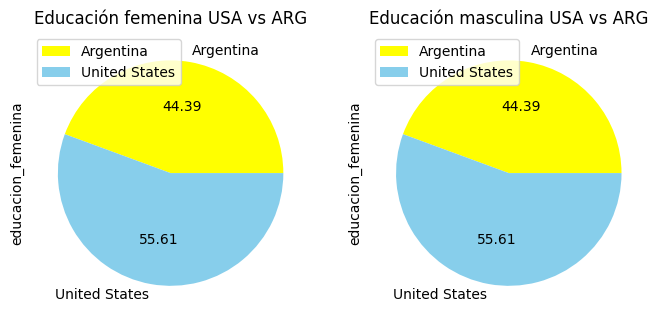

In [64]:
# Aca usamos el metodo para graficar propio de Pandas, no de matplotlib

# Vamos a graficar un plot por cada una de las columnas, de ahi lo de subplots=True
ax1, ax2 = aux.plot.pie(subplots=True,figsize=(8,4), colors=['yellow', 'skyblue'],
                      autopct='%.2f')

ax1.set_title('Educación femenina USA vs ARG', color='black')
ax2.set_title('Educación masculina USA vs ARG', color='black')

### Serie de tiempo

Vemos la educacion en la poblacion a lo largo de los años

In [65]:
date_time = datetime.datetime(1950,1,1), datetime.datetime(2010,1,1) # esto nos va a servir para indicar que queremos los datos desde 1950 a 2010
print(date_time)


# Porcentaje de no educacion en la población
indicadores = {'BAR.NOED.1519.ZS':'15-19','BAR.NOED.2024.ZS':'20-24',
              'BAR.NOED.2529.ZS':'25-29', 'BAR.NOED.3034.ZS':'30-34',
              'BAR.NOED.3539.ZS':'35-39' , 'BAR.NOED.4044.ZS':'40-44',
              'BAR.NOED.4549.ZS':'45-49', 'BAR.NOED.5054.ZS':'50-54',
              'BAR.NOED.5559.ZS':'55-59'}

data = wbdata.get_dataframe(indicadores, country = 'ARG', date = date_time)
df = pd.DataFrame(data=data)

(datetime.datetime(1950, 1, 1, 0, 0), datetime.datetime(2010, 1, 1, 0, 0))


In [66]:
df.head()

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.3,0.25,0.25,0.8,0.29,0.72,0.72,1.2,1.2
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
print('Valores nulos:',sum(df.isna().sum()))

Valores nulos: 360


El dataset contiene va desde el año 1950 a 2010 y con ddatos cada cinco años. Como vamos a enfocarnos en la visualizacion dejamos los datos nulos de lado.

In [68]:
df.dropna(inplace=True)

In [69]:
df.head(df.shape[0])

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.30,0.25,0.25,0.80,0.29,0.72,0.72,1.20,1.20
2005,0.30,0.25,0.80,0.29,0.72,0.72,1.20,1.20,2.44
2000,0.83,1.30,1.62,2.05,2.74,2.74,4.09,4.09,5.49
1995,0.98,1.62,1.91,3.43,3.43,3.82,3.82,5.17,5.17
1990,1.60,1.80,4.00,4.00,3.60,3.60,4.90,4.90,6.50
1985,1.36,4.00,2.84,3.43,3.43,4.63,4.63,5.89,5.89
1980,1.30,1.90,3.30,3.30,4.40,4.40,5.40,5.40,6.80
1975,2.08,3.30,3.19,4.18,4.18,5.40,5.40,7.30,7.30
1970,2.70,3.10,4.00,4.00,5.40,5.40,7.70,7.70,11.90


In [70]:
df.shape

(11, 9)

Breve resumen descriptivo

In [71]:
df.describe()

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.630909,2.356364,3.466364,4.227273,4.473636,4.862727,5.447273,6.072727,6.967273
std,1.117448,1.485680,3.126382,3.429446,3.403014,3.468573,3.393211,3.576638,3.676621
min,0.300000,0.250000,0.250000,0.290000,0.290000,0.720000,0.720000,1.200000,1.200000
25%,0.905000,1.460000,1.765000,2.675000,3.085000,3.170000,3.955000,4.495000,5.330000
50%,1.360000,1.900000,3.190000,3.430000,3.600000,4.400000,4.900000,5.400000,6.500000
75%,2.285000,3.650000,4.000000,4.090000,4.900000,5.400000,6.550000,7.500000,9.600000
max,4.000000,4.400000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000


Graficamos el porcentaje de la poblacion no educado de toda la población para distintas categorías de edades.

In [72]:
# df.iloc[0:5,0:2] ejemplo
df.iloc[8,]

,1970
15-19,2.7
20-24,3.1
25-29,4.0
30-34,4.0
35-39,5.4
40-44,5.4
45-49,7.7
50-54,7.7
55-59,11.9


([<matplotlib.axis.XTick at 0x7911b9f5a590>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

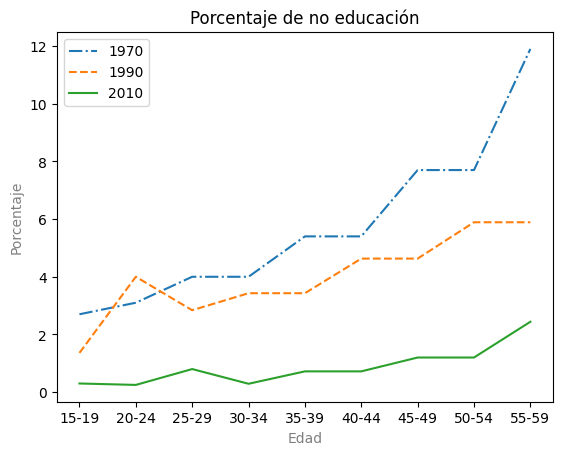

In [73]:
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df.iloc[5,].plot(style = ('--'), label = '1990', legend = True)
df.iloc[1,].plot(style = '-', label = '2010', legend = True)
plt.title('Porcentaje de no educación')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
# 9 valores discretos, que corresponden a las 9 columnas, de las cuales ademas se toma el nombre de cada una:
plt.xticks(range(0, 9, 1),df.columns.tolist())

Text(0.5, 0, 'Año')

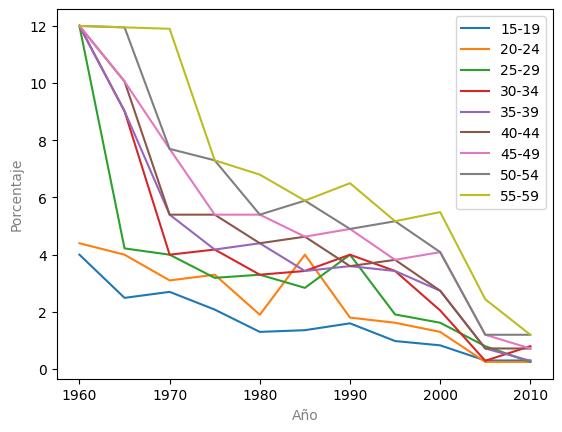

In [74]:
df.sort_index(axis=0, inplace=True)
df.plot(style = '-')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Año', color = 'grey')

Esta vez lo hacemos sólo para la población femenina.

In [75]:
date_time = datetime.datetime(1950,1,1), datetime.datetime(2010,1,1)

# Porcentaje de mujeres sin educacion por rango etario
indicadores = {'BAR.NOED.1519.FE.ZS':'15-19','BAR.NOED.2024.FE.ZS':'20-24',
              'BAR.NOED.2529.FE.ZS':'25-29', 'BAR.NOED.3034.FE.ZS':'30-34',
              'BAR.NOED.3539.FE.ZS':'35-39' , 'BAR.NOED.4044.FE.ZS':'40-44',
              'BAR.NOED.4549.FE.ZS':'45-49', 'BAR.NOED.5054.FE.ZS':'50-54',
              'BAR.NOED.5559.FE.ZS':'55-59'}

df1 = wbdata.get_dataframe(indicadores, country = 'ARG', date=date_time)
df1.dropna(inplace = True)

In [76]:
df1.head()

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.20,0.22,0.22,0.89,0.27,0.73,0.73,1.56,1.56
2005,0.20,0.22,0.89,0.27,0.73,0.73,1.56,1.56,3.12
2000,0.73,1.18,1.51,1.93,2.65,2.65,4.07,4.07,5.70
1995,1.38,1.51,1.86,2.46,2.46,3.81,3.81,6.85,6.85
1990,1.20,1.80,2.30,2.30,3.60,3.60,7.80,7.80,6.80


Porcentaje no educado de la población femenina.

([<matplotlib.axis.XTick at 0x7911ba4cc760>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

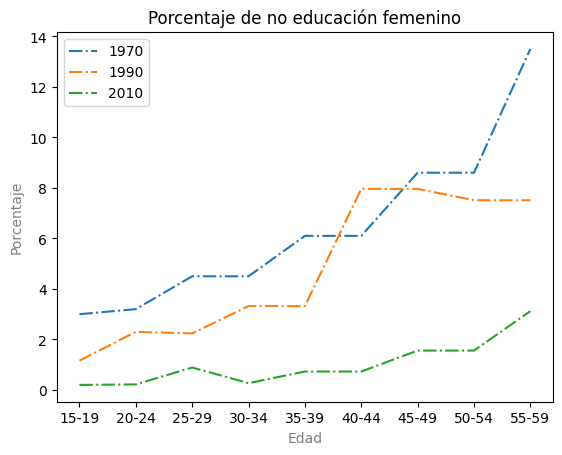

In [50]:
df1.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[5,].plot(style = '-.', label = '1990', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010', legend = True)
plt.title('Porcentaje de no educación femenino')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
plt.xticks(range(0, df1.shape[1], 1),df1.columns.tolist())

Ahora comparamos la educacion de la población total vs población femenina en los años 1970 y 2010.

([<matplotlib.axis.XTick at 0x7911ba454c10>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

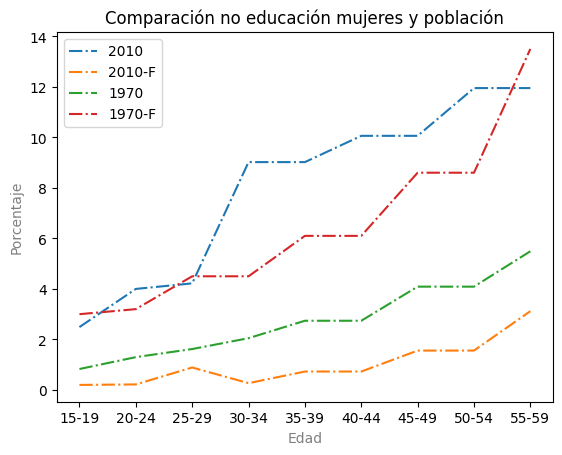

In [77]:
# 2010
df.iloc[1,].plot(style = '-.', label = '2010', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010-F', legend = True)
# 1970
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[8,].plot(style = '-.', label = '1970-F', legend=True)
plt.title('Comparación no educación mujeres y población')
plt.xlabel('Edad', color = 'grey')
plt.ylabel('Porcentaje', color = 'grey')
plt.xticks(range(0, df1.shape[1], 1),df.columns.tolist())

Vemos que luego de 40 años la brecha se acoto.

## Gráfico de barras


In [78]:
df.head(5)

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
1960,4.00,4.4,12.00,12.00,12.00,12.00,12.00,12.00,12.00
1965,2.49,4.0,4.22,9.02,9.02,10.06,10.06,11.95,11.95
1970,2.70,3.1,4.00,4.00,5.40,5.40,7.70,7.70,11.90
1975,2.08,3.3,3.19,4.18,4.18,5.40,5.40,7.30,7.30
1980,1.30,1.9,3.30,3.30,4.40,4.40,5.40,5.40,6.80


Text(0, 0.5, 'Porcentaje')

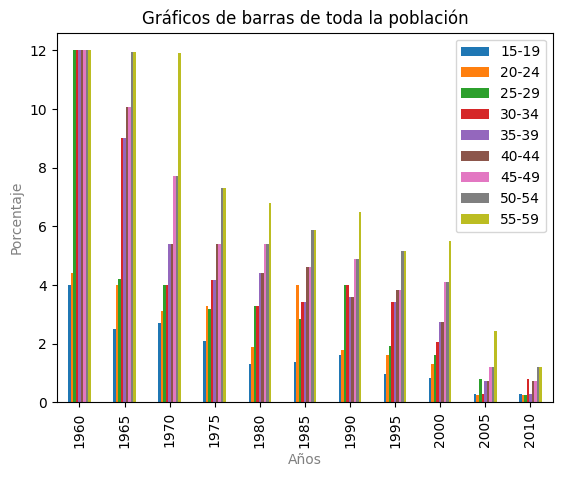

In [80]:
ax = df.plot(kind='bar',
       title='Gráficos de barras de toda la población') # metodo propio de pandas
ax.set_xlabel('Años',color='grey')
ax.set_ylabel('Porcentaje',color='grey')

Lo hacemos en horizontal y apilamos la población en una barra.

Text(0, 0.5, 'Años')

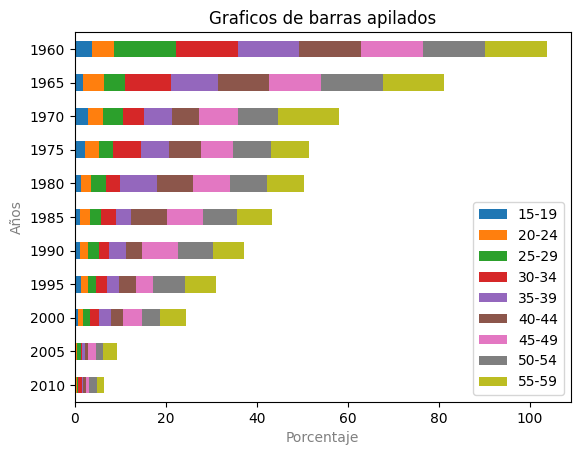

In [81]:
ax = df1.plot.barh(stacked=True) # barras horizontales (barh) y apiladas
ax.set_title('Graficos de barras apilados')
ax.set_xlabel('Porcentaje',color='grey')
ax.set_ylabel('Años',color='grey')

Text(0, 0.5, 'Años')

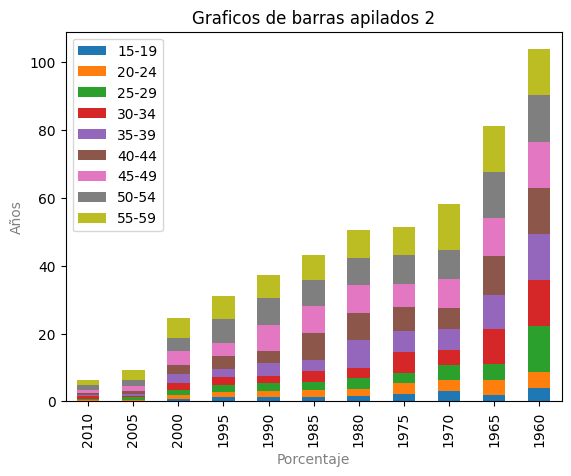

In [83]:
ax = df1.plot(kind="bar", stacked=True) # otra forma
ax.set_title('Graficos de barras apilados 2')
ax.set_xlabel('Porcentaje',color='grey')
ax.set_ylabel('Años',color='grey')

## Histogramas

Vamos a trabajar con el [Indice de facilidad para hacer negocios](https://es.wikipedia.org/wiki/%C3%8Dndice_de_facilidad_para_hacer_negocios) en distintos países.


Seleccionamos los paises a utilizar y creamos el dataframe.

In [86]:
paises = [i['id'] for i in wbdata.get_countries(incomelevel=['LIC','HIC'])]
print(paises)

# Seleccionamos nuestros nuevos datos
indicadores = {"IC.BUS.EASE.XQ": "indice_negocio", "NY.GDP.PCAP.PP.KD": "PIBPC"}

data = wbdata.get_dataframe(indicadores, country=paises, parse_dates=True)
df = pd.DataFrame(data=data)

['ABW', 'AFG', 'AND', 'ARE', 'ASM', 'ATG', 'AUS', 'AUT', 'BDI', 'BEL', 'BFA', 'BGR', 'BHR', 'BHS', 'BMU', 'BRB', 'BRN', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL', 'COD', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DNK', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'FRO', 'GBR', 'GIB', 'GMB', 'GNB', 'GRC', 'GRL', 'GUM', 'GUY', 'HKG', 'HRV', 'HUN', 'IMN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KNA', 'KOR', 'KWT', 'LBR', 'LIE', 'LTU', 'LUX', 'LVA', 'MAC', 'MAF', 'MCO', 'MDG', 'MLI', 'MLT', 'MNP', 'MOZ', 'MWI', 'NCL', 'NER', 'NLD', 'NOR', 'NRU', 'NZL', 'OMN', 'PAN', 'PLW', 'POL', 'PRI', 'PRK', 'PRT', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SGP', 'SLE', 'SMR', 'SOM', 'SSD', 'SVK', 'SVN', 'SWE', 'SXM', 'SYC', 'SYR', 'TCA', 'TCD', 'TGO', 'TTO', 'UGA', 'URY', 'USA', 'VGB', 'VIR', 'YEM']


In [87]:
df.dropna(inplace=True)

In [88]:
df.head()

,,indice_negocio,PIBPC
country,date,,
Afghanistan,2019-01-01,173.0,2933.958598
United Arab Emirates,2019-01-01,16.0,70638.732731
Antigua and Barbuda,2019-01-01,113.0,29394.629012
Australia,2019-01-01,14.0,57188.294949
Austria,2019-01-01,27.0,65721.990480


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 83 entries, ('Afghanistan', Timestamp('2019-01-01 00:00:00')) to ('United States', Timestamp('2019-01-01 00:00:00'))
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   indice_negocio  83 non-null     float64
 1   PIBPC           83 non-null     float64
dtypes: float64(2)
memory usage: 9.1+ KB


In [90]:
df.head()

,,indice_negocio,PIBPC
country,date,,
Afghanistan,2019-01-01,173.0,2933.958598
United Arab Emirates,2019-01-01,16.0,70638.732731
Antigua and Barbuda,2019-01-01,113.0,29394.629012
Australia,2019-01-01,14.0,57188.294949
Austria,2019-01-01,27.0,65721.990480


Text(0, 0.5, 'Frecuencia')

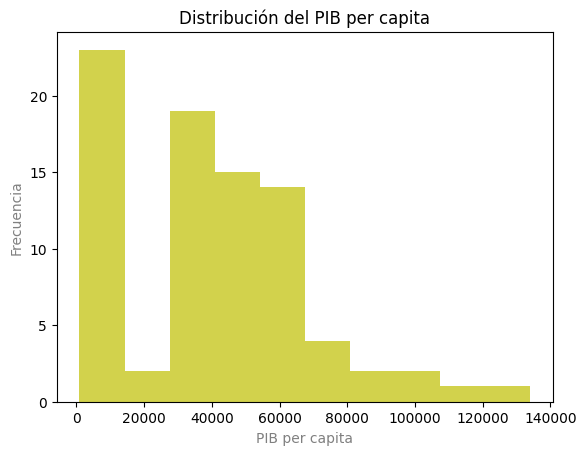

In [95]:
plt.figure()
# Histograma propio de pandas
df['PIBPC'].plot.hist(alpha=0.7,  # Con alpha seteamos la transparencia
                     color='y',
                     bins=10,
                     title='Distribución del PIB per capita')
plt.xlabel('PIB per capita', color='grey')
plt.ylabel('Frecuencia',color='grey')

## Box plot

Box plot es un grafico que consiste en una caja. Dicha caja contiene en su interior el 50% de los datos, mientras que lo que se encuentra en la línea fuera y debajo de la caja es otro 25% y lo mismo ocurre con los datos que se encuentran en la línea vertical fuera y sobre la caja, es decir, el último 25%.

<Axes: title={'center': 'Diagrma de caja PIB'}>

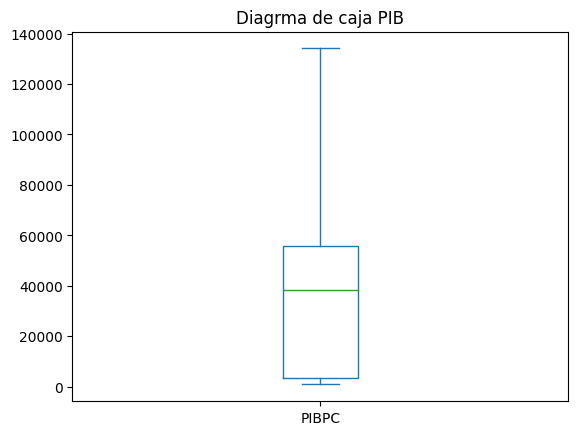

In [96]:
df['PIBPC'].plot.box(title='Diagrma de caja PIB')

Recordamos que dentro de la caja se encuentra el 50% de la población. La línea verde indica la mediana.

## Scatter plot

Hacemos un gráfico de dispersión entre las variables PIB p/ capita e Indice de facilidad p/ hacer negocios.

Text(0, 0.5, 'PIB per capita')

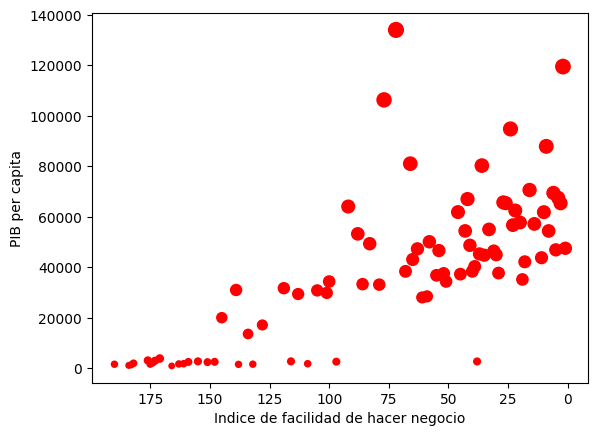

In [100]:
# grafico de puntos propio de pandas
df.plot.scatter(y='PIBPC', x='indice_negocio',
                c='r',
                s=df['PIBPC']**0.4    # Con s seteamos el tamaño de los puntos segun el crecimiento de la variable PBI per capita
               )

plt.gca().invert_xaxis() # esto invierte el eje x
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

Es intuitivo que en los países con más facilidad para los negocios tienen un PIB per capita más alto.

Finalmente vemos una variante al gráfico de dispersión, un gráfico hexagonal.

Text(0, 0.5, 'PIB per capita')

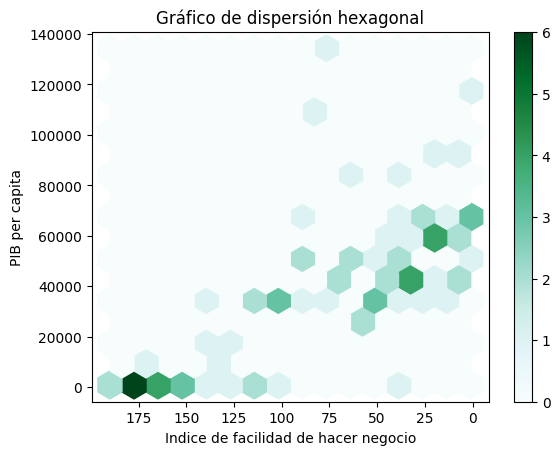

In [101]:
df.plot.hexbin(y='PIBPC', x='indice_negocio', gridsize=15,
              title='Gráfico de dispersión hexagonal')
plt.gca().invert_xaxis()
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

## Plotly

En esta sección utilizaremos la librería [Plotly](https://plotly.com/) para realizar los gráficos. En principio se usará [Plotly Express](https://plotly.com/python/plotly-express/) Luego, en más profundidad se vera un ejemplo con la librería [Plotly Graph Objects](https://plotly.com/python/graph-objects/) que nos permitirá una mayor configuración de los gráficos.

In [102]:
import plotly.express as px
import plotly.graph_objects as go

In [103]:
a = pd.read_csv('https://unket.s3-sa-east-1.amazonaws.com/data/dataset_reporte_covid_sitio_gobierno.csv')
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51844 entries, 0 to 51843
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FECHA          51844 non-null  object 
 1   TIPO_REPORTE   51844 non-null  object 
 2   TIPO_DATO      51844 non-null  object 
 3   SUBTIPO_DATO   51844 non-null  object 
 4   VALOR          51844 non-null  float64
 5   FECHA_PROCESO  51844 non-null  object 
 6   ID_CARGA       51844 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 2.8+ MB


In [104]:
a.head()

,FECHA,TIPO_REPORTE,TIPO_DATO,SUBTIPO_DATO,VALOR,FECHA_PROCESO,ID_CARGA
0,22JUL2020:00:00:00,reporte_prensa,casos_residentes,casos_confirmados_reportados_del_dia,1408.0,09JUN2021:00:00:00,2072714
1,23JUL2020:00:00:00,reporte_prensa,casos_residentes,casos_confirmados_reportados_del_dia,1274.0,09JUN2021:00:00:00,2072714
2,24JUL2020:00:00:00,reporte_prensa,casos_residentes,casos_confirmados_reportados_del_dia,1142.0,09JUN2021:00:00:00,2072714
3,25JUL2020:00:00:00,reporte_prensa,casos_residentes,casos_confirmados_reportados_del_dia,1094.0,09JUN2021:00:00:00,2072714
4,26JUL2020:00:00:00,reporte_prensa,casos_residentes,casos_confirmados_reportados_del_dia,916.0,09JUN2021:00:00:00,2072714


In [105]:
a['FECHA'] = pd.to_datetime(a['FECHA'], format='%d%b%Y:%H:%M:%S')

Veamos la ocupacion de camas en hospitales del sistema público.

In [109]:
a.sort_values(by='FECHA', inplace=True)
aux1 = a[(a['TIPO_DATO'] == 'ocupacion_de_camas_sistema_publico')  &  (a['SUBTIPO_DATO'].isin(['graves_total', 'graves_arm', 'graves_no_arm']))]
aux2 = a[(a['TIPO_DATO'] == 'total_de_camas_sistema_publico') & (a['SUBTIPO_DATO'] == 'graves')]
aux2.replace({'graves':'camas'}, inplace = True)

aux = pd.concat([aux1, aux2])

aux.head()

<ipython-input-109-903b2f51fff5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux2.replace({'graves':'camas'}, inplace = True)


,FECHA,TIPO_REPORTE,TIPO_DATO,SUBTIPO_DATO,VALOR,FECHA_PROCESO,ID_CARGA
3111,2020-07-01,reporte_prensa,ocupacion_de_camas_sistema_publico,graves_total,226.0,09JUN2021:00:00:00,2072714
3112,2020-07-02,reporte_prensa,ocupacion_de_camas_sistema_publico,graves_total,221.0,09JUN2021:00:00:00,2072714
3113,2020-07-03,reporte_prensa,ocupacion_de_camas_sistema_publico,graves_total,230.0,09JUN2021:00:00:00,2072714
3114,2020-07-04,reporte_prensa,ocupacion_de_camas_sistema_publico,graves_total,225.0,09JUN2021:00:00:00,2072714
3115,2020-07-05,reporte_prensa,ocupacion_de_camas_sistema_publico,graves_total,236.0,09JUN2021:00:00:00,2072714


Veamos los casos, fallecidos y recuperados a nivel diario.

In [112]:
px.line(data_frame = aux, x = 'FECHA', y='VALOR', color='SUBTIPO_DATO', title='Ocupacion de camas en hospitales publicos')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [111]:
# Casos confirmados reportados del dia
A = a.loc[(a['TIPO_DATO'] == 'casos_residentes') & (a['SUBTIPO_DATO'] == 'casos_confirmados_reportados_del_dia'), ['FECHA', 'VALOR']].sort_values(by='FECHA')
B = a.loc[(a['TIPO_DATO'] == 'casos_residentes') & (a['SUBTIPO_DATO'] == 'fallecidos_reportados_del_dia'), ['FECHA', 'VALOR']].sort_values(by='FECHA')
C = a.loc[(a['TIPO_DATO'] == 'casos_residentes') & (a['SUBTIPO_DATO'] == 'recuperados_del_dia'), ['FECHA', 'VALOR']].sort_values(by='FECHA')

In [113]:
# Objeto Grafico de Plotly
traza1 = go.Bar(
    x = A['FECHA'],
    y = A['VALOR'],
    name = 'Casos confirmados diarios',
    opacity = 1
)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [114]:
traza2 = go.Bar(
    x = B['FECHA'],
    y = B['VALOR'],
    name = 'Fallecidos diarios',
    opacity = 1,
)

In [115]:
traza3 = go.Bar(
    x = C['FECHA'],
    y = C['VALOR'],
    name = 'Recuperados diarios',
    opacity = 1,
)

In [116]:
# Agrego plantilla del objeto
plantilla = go.Layout(title='Histogramas por día de semana')

fig = go.Figure(data=[traza1, traza2, traza3], layout=plantilla)

# Agrego fancy slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

## Extra

En este [link](https://colab.research.google.com/github/institutohumai/talleres/blob/master/Twitter_Social_Listening_ejemplo.ipynb#scrollTo=9wbAMuv6nI1t&uniqifier=1) enccontraran una herramienta que clusteriza tweets. Para ello los tweets primero son transformados a embeddings los cuales son vectores de variables discretas. Estos vectores que representan los tweets luego son graficado en 3D, sí ¡3 dimensiones!, con la librería Plotly. Se recomienda inspeccionar el código de la notebook al igual que jugar con la interfaz de la herramienta.